In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from planetaryimage import CubeFile

In [2]:
cube = CubeFile.open('../Pluto_NewHorizons_Global_DEM_300m_Jul2017_32bit.cub')

In [3]:
print cube.dtype
print cube.tile_shape
print cube.PIXEL_TYPES
print cube.SPECIAL_PIXELS
print cube.format

float32
(366, 488)
{'Real': dtype('float32'), 'SignedWord': dtype('int16'), 'UnsignedByte': dtype('uint8'), 'Double': dtype('float64'), 'UnsignedInteger': dtype('uint32'), 'SignedInteger': dtype('int32'), 'SignedByte': dtype('int8'), 'UnsignedWord': dtype('uint16')}
{'Real': {'His': -3.4028233e+38, 'Min': -3.4028225e+38, 'Max': 3.4028235e+38, 'Hrs': -3.4028235e+38, 'Lrs': -3.4028229e+38, 'Lis': -3.4028231e+38, 'Null': -3.4028227e+38}, 'UnsignedByte': {'His': 255, 'Min': 1, 'Max': 254, 'Hrs': 255, 'Lrs': 0, 'Lis': 0, 'Null': 0}, 'Double': {'His': -1.7976931348623155e+308, 'Min': -1.7976931348623147e+308, 'Max': 1.7976931348623157e+308, 'Hrs': -1.7976931348623157e+308, 'Lrs': -1.7976931348623151e+308, 'Lis': -1.7976931348623153e+308, 'Null': -1.7976931348623149e+308}, 'SignedWord': {'His': -32765, 'Min': -32752, 'Max': 32767, 'Hrs': -32764, 'Lrs': -32767, 'Lis': -32766, 'Null': -32768}, 'SignedInteger': {'His': -8388610, 'Min': -8388614, 'Max': 2147483647, 'Hrs': -8388609, 'Lrs': -838861

In [ ]:
print cube.data.min(), cube.data.max(), cube.data[np.where(np.isfinite(cube.data))].mean()

-3.40282e+38 

In [ ]:
cube.data

In [ ]:
cube_arr = cube.apply_numpy_specials()

In [7]:
cube_arr.data

<read-write buffer for 0x10b39df30, size 2477650176, offset 0 at 0x1059e0f30>

In [8]:
cube_arr_fin = cube_arr[np.where(np.isfinite(cube_arr))]
print cube_arr_fin.min(), cube_arr_fin.max(), cube_arr_fin.mean()

-4100.84521484 6490.81982422 442.229966772


In [9]:
print cube.data.shape,cube_arr.shape
print cube_arr[0].shape

(1, 12444, 24888) (1, 12444, 24888)
(12444, 24888)


In [10]:
#plt.figure()
#plt.imshow(cube_arr[0])
#plt.show()

In [11]:
test = cube_arr[0,5200:5600,7250:8000]

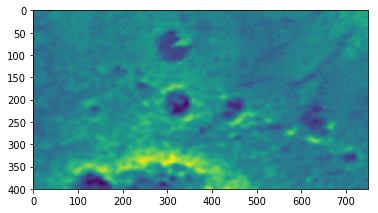

In [12]:
plt.figure()
plt.imshow(test)
plt.show()

In [13]:
#test2 = cube_arr[0,4500:5500,7000:9000]
#test2 = cube_arr[0,5000:5250,7700:8250]
test2 = cube_arr[0,5150:5350,8750:8950]

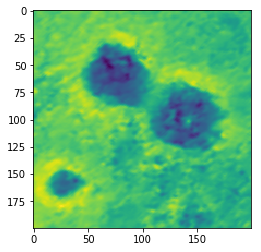

In [14]:
plt.figure()
plt.imshow(test2)
plt.show()

In [15]:
test

array([[  483.99734497,   475.56393433,   463.793396  , ...,
         1176.50097656,  1144.05236816,  1100.40429688],
       [  490.94638062,   489.82775879,   486.47128296, ...,
         1117.62878418,  1081.53869629,  1048.51635742],
       [  501.50561523,   503.75228882,   506.43740845, ...,
         1058.38989258,  1024.75683594,  1012.18341064],
       ..., 
       [  581.21588135,   577.31964111,   574.86175537, ...,
          314.51043701,   318.83514404,   322.83758545],
       [  579.54467773,   573.27130127,   569.7722168 , ...,
          284.34121704,   305.70458984,   318.85986328],
       [  580.40258789,   576.1862793 ,   577.11767578, ...,
          259.79769897,   282.42825317,   305.34106445]])

In [16]:
test_dy, test_dx = np.gradient(test)
print test_dx.min(), test_dx.max(),test_dy.min(),test_dy.max()

-184.353191376 247.013708115 -381.064758301 230.595870972


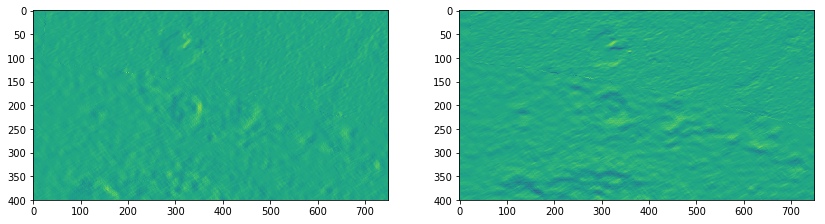

In [17]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].imshow(test_dx,vmin=-600,vmax=400)
ax[1].imshow(test_dy,vmin=-600,vmax=400)
plt.show()

In [151]:
from skimage import filters as skfilt

In [235]:
test_gau_05 = skfilt.gaussian(test,sigma=5,preserve_range=True)
test_gau_10 = skfilt.gaussian(test,sigma=10,preserve_range=True)
test_gau_20 = skfilt.gaussian(test,sigma=20,preserve_range=True)

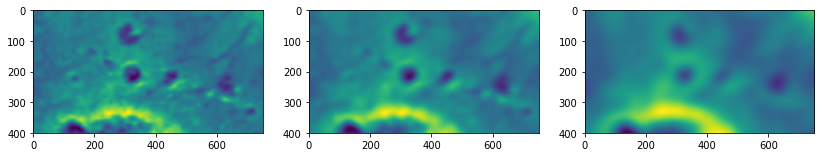

In [236]:
fig_gau,ax_gau = plt.subplots(1,3,figsize=(14,6))
ax_gau[0].imshow(test_gau_05)
ax_gau[1].imshow(test_gau_10)
ax_gau[2].imshow(test_gau_20)
plt.show()

In [237]:
print test.shape

#ex_foc_pix = (600,400)
#ex_foc_pix = (600, 1000)
ex_foc_pix = (400,650)
l_blur = 5

(400, 750)


In [238]:
indicies = np.indices(test.shape)
gradient = np.gradient(test)
ctran = 0
C = np.zeros(test.shape)

for y,x in np.ndindex(test.shape): #(row#[y],col#[x])
    if x%100==0:
        print y,x
    dist = ((indicies[0] - y)**2 + (indicies[1] - x)**2)**(0.5) #might want to check w/o sqrt
    blur = np.exp(-dist/(2.*l_blur**2))
    direc = np.ones(indicies.shape,dtype=int)
    direc[0] = direc[0]*y
    direc[1] = direc[1]*x
    prod = gradient*direc
    c_tran = np.sum(blur * (prod[0]+prod[1]))
    C[y,x] = c_tran 

0 0
0 100
0 200
0 300
0 400
0 500
0 600
0 700
1 0
1 100
1 200
1 300
1 400
1 500
1 600
1 700
2 0
2 100
2 200
2 300
2 400
2 500
2 600
2 700
3 0
3 100
3 200
3 300
3 400
3 500
3 600
3 700
4 0
4 100
4 200
4 300
4 400
4 500
4 600
4 700
5 0
5 100
5 200
5 300
5 400
5 500
5 600
5 700
6 0
6 100
6 200
6 300
6 400
6 500
6 600
6 700
7 0
7 100
7 200
7 300
7 400
7 500
7 600
7 700
8 0
8 100
8 200
8 300
8 400
8 500
8 600
8 700
9 0
9 100
9 200
9 300
9 400
9 500
9 600
9 700
10 0
10 100
10 200
10 300
10 400
10 500
10 600
10 700
11 0
11 100
11 200
11 300
11 400
11 500
11 600
11 700
12 0
12 100
12 200
12 300
12 400
12 500
12 600
12 700
13 0
13 100
13 200
13 300
13 400
13 500
13 600
13 700
14 0
14 100
14 200
14 300
14 400
14 500
14 600
14 700
15 0
15 100
15 200
15 300
15 400
15 500
15 600
15 700
16 0
16 100
16 200
16 300
16 400
16 500
16 600
16 700
17 0
17 100
17 200
17 300
17 400
17 500
17 600
17 700
18 0
18 100
18 200
18 300
18 400
18 500
18 600
18 700
19 0
19 100
19 200
19 300
19 400
19 500
19 600
19 700


In [241]:
C.min(), C.max()

(-30640782.287501499, 11090728.034422265)

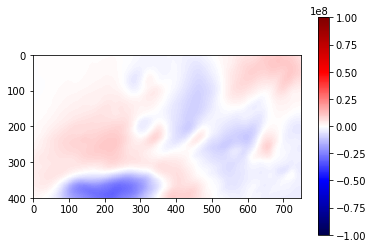

In [274]:
fig_C_20, ax_C_20 = plt.subplots()
ax_C_20 = plt.imshow(C,vmin=-1.e+8,vmax=1.e+8,cmap='seismic')
cbar = plt.colorbar()
plt.show()

In [41]:
l_blur2 = 10 #length (pixel) scale to look for craters

# Initialize
%timeit indicies2 = np.indices(test2.shape) #row [0] and col [1] indicies for position
%timeit gradient2 = np.gradient(test2) #row [0] and col [1] gradients of elevation
%timeit direc2 = np.ones(indicies2.shape,dtype=int) # to find direction (y-comp [0], x-comp[1])
%timeit ctran2 = 0 #C-transform init for single pixel
%timeit C2 = np.zeros(test2.shape) #Array of C-transfrom, "artificial elevation"

print 'now loop'

# Do for each pixel
for y,x in np.ndindex(test2.shape): # index iterator (row [y], col [x])
    %timeit dist2 = (indicies2[0] - y)**2 + (indicies2[1] - x)**2 # square of vector diff
    %timeit blur2 = np.exp(-1*dist2/(2.*l_blur2**2)) # like Gaussian blur (lambda-dependent)
    %timeit direc_yx = np.copy(direc2) # new copy for given point
    %timeit direc_yx[0] = direc2[0]*y # y val to subtract from each row from point
    %timeit direc_yx[1] = direc2[1]*x # x val to subtract from each col from point
    %timeit direc_vec2 = (indicies2-direcyx)/np.abs(indicies2-direcyx) #distance components from point
    %timeit prod2 = gradient2*direc_vec2 #first part of dot product
    %timeit c_tran2 = np.sum(blur2 * (prod2[0]+prod2[1])) #add to complete dot, multiply by blur, sum over all pixels
    %timeit C2[y,x] = c_tran2 #put final value at corresponding point in new array
    break

10000 loops, best of 3: 55.9 µs per loop
1000 loops, best of 3: 416 µs per loop
10000 loops, best of 3: 40.8 µs per loop
10000000 loops, best of 3: 25.6 ns per loop
100000 loops, best of 3: 13.2 µs per loop
now loop
10000 loops, best of 3: 163 µs per loop
1000 loops, best of 3: 543 µs per loop
10000 loops, best of 3: 40.9 µs per loop
10000 loops, best of 3: 53.1 µs per loop
10000 loops, best of 3: 53.2 µs per loop
1000 loops, best of 3: 1.47 ms per loop
10000 loops, best of 3: 192 µs per loop
10000 loops, best of 3: 92.8 µs per loop
The slowest run took 15.58 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 199 ns per loop


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:257: RuntimeWarning: divide by zero encountered in divide


Lines that take the longest are: blur, gradient, C_tran sum

In [ ]:
def C_transform(elevation, foc_pix_row, foc_pix_col, l_blur):
    '''
    Find C-transform for a given pixel in an image. Uses Gaussian-like blur to 
    focus around lambda-scale neighborhood around the focal pixel along with 
    gradient of elevation to determine how strongly the slope points toward
    the focal pixel. Final C-transform value is an "artificial elevation."
    
    Proposed by Stepinski et al. (2009) - https://doi.org/10.1016/j.icarus.2009.04.026
    Used also in Liu et al. (2015) - https://doi.org/10.1007/s11038-015-9467-9
    
    **Possible upgrade: fairly slow, doesn't seem necessary to use every pixel in image
    for each focal pixel - think I could use a smaller kernal that's dependent on 
    the lambda length scale to possibly speed up (haven't actually tested speed of components)
    
    **change -1,0,1 part to skip division by 0
    
    Inputs
    ------
    image: 
    foc_pix_x,y:
    l_blur:
    
    Returns
    -------
    C_tran: float, value of transform at foc_pixel
    '''
    indicies = np.indices(elevation.shape) #row [0] and col [1] index arrays for position
    gradient = np.gradient(elevation) #row [0] and col [1] gradients of elevation
    
    dist = (indicies[0] - foc_pix_row)**2 + (indicies[1] - foc_pix_col)**2 # square of vector diff
    blur = np.exp(-1*dist/(2.*l_blur**2)) # like Gaussian blur (lambda-dependent)
    
    direc_yx = np.ones(indicies.shape,dtype=int) # to find direction (y-comp [0], x-comp[1])
    direc_yx[0] = direc_yx[0]*foc_pix_row # y val to subtract from each row from point
    direc_yx[1] = direc_yx[1]*foc_pix_col # x val to subtract from each col from point
    with np.errstate(divide='ignore', invalid='ignore'): #ignore division by 0
        direc_vec = (indicies-direc_yx)/np.abs(indicies-direc_yx) #distance components from point
    
    prod = gradient*direc_vec #first part of dot product
    C_tran = np.sum(blur * (prod[0]+prod[1])) #add to complete dot, multiply by blur, sum over all pixels
    
    return C_tran #return "artificial elevation"
    

In [57]:
C_transform(test2,50,100,10)

-1631.1497702019908

In [51]:
def C_transform_image(elevation,l_blur):
    '''
    Find C-transform for each pixel in image and 
    retrun a new image in "artificial elevation" units
    New array represents how strongly (positive) the slopes within lambda
    of a given pixel point toward that pixel.
    
    Calls C_transform for each point
    
    Inputs
    ------
    elevation: array, DEM
    l_blur: scale of neighborhood to look around given pixel (blur)
    
    Returns
    -------
    C_t_array: array, C-transform for each pixel
    '''
    # Initialize new array
    C_t_array = np.zeros(elevation.shape)
    
    for row_y, col_x in np.ndindex(elevation.shape): # index iterator (row [y], col [x])
        C_t_array[row_y,col_x] = C_transform(elevation,row_y,col_x,l_blur)
    
    return C_t_array

In [289]:
ftest = C_transform_image(test2,5)

In [290]:
print ftest.min(),ftest.max(),ftest.mean()

-12997.6694671 13295.9216709 0.168750705562


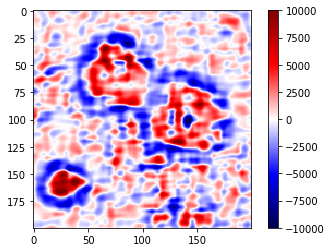

In [293]:
plt.figure()
plt.imshow(ftest,cmap='seismic',vmin=-1.e+4,vmax=1.e+4)
plt.colorbar()
plt.show()

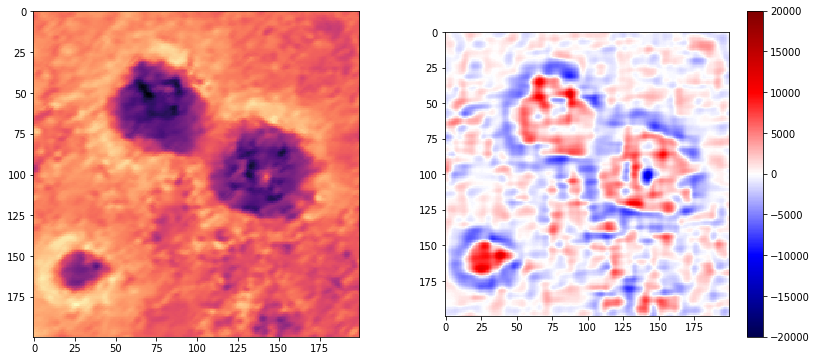

In [294]:
fig_C_2, ax_C_2 = plt.subplots(1,2,figsize=(14,6))
ax_C_2[1] = plt.imshow(ftest,cmap='seismic',vmin=-2.e+4,vmax=2.e+4)
ax_C_2[0].imshow(test2,cmap='magma')
cbar2 = plt.colorbar()
plt.show()

In [74]:
for x,y in np.ndindex(np.array([[1,2,3],[4,5,6]]).shape):
    print x,y

0 0
0 1
0 2
1 0
1 1
1 2


In [66]:
np.ndindex()

(2, 3)

In [108]:
far = np.array([[1,2,3,1],[4,5,6,1],[7,8,9,1],[1,2,3,4]])
far 

array([[1, 2, 3, 1],
       [4, 5, 6, 1],
       [7, 8, 9, 1],
       [1, 2, 3, 4]])

In [189]:
fpos = (2,1) #y,x
rows, cols = np.indices(far.shape)
print np.exp(-((rows - fpos[0])**2 + (cols - fpos[1])**2))
print (rows-fpos[0])/np.abs(rows-fpos[0])
print (cols-fpos[1])/np.abs(cols-fpos[1])

[[  6.73794700e-03   1.83156389e-02   6.73794700e-03   3.35462628e-04]
 [  1.35335283e-01   3.67879441e-01   1.35335283e-01   6.73794700e-03]
 [  3.67879441e-01   1.00000000e+00   3.67879441e-01   1.83156389e-02]
 [  1.35335283e-01   3.67879441e-01   1.35335283e-01   6.73794700e-03]]
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]
[[-1  0  1  1]
 [-1  0  1  1]
 [-1  0  1  1]
 [-1  0  1  1]]


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


In [149]:
print np.indices(far.shape)

[[[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]
  [3 3 3 3]]

 [[0 1 2 3]
  [0 1 2 3]
  [0 1 2 3]
  [0 1 2 3]]]


In [163]:
fdif = np.ones(np.indices(far.shape).shape,dtype=int)
fdif[0] = fdif[0]*fpos[0]
fdif[1] = fdif[1]*fpos[1]
print fdif

[[[2 2 2 2]
  [2 2 2 2]
  [2 2 2 2]
  [2 2 2 2]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


In [167]:
direc_vec = (np.indices(far.shape)-fdif)/np.abs(np.indices(far.shape)-fdif)
print direc_vec

[[[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 0  0  0  0]
  [ 1  1  1  1]]

 [[-1  0  1  1]
  [-1  0  1  1]
  [-1  0  1  1]
  [-1  0  1  1]]]


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [66]:
x_deriv_k = np.array([-0.5,0.5])
ty = 50
tx = 100
new_val = np.sum(np.array([ftest[ty,tx-1],ftest[ty,tx+1]])*x_deriv_k)
print new_val

-2313.68516675


In [75]:
import scipy.signal as sig
import scipy.ndimage as snd

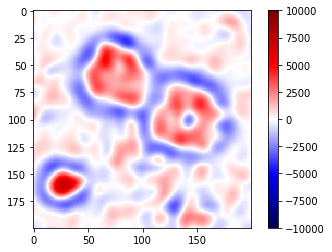

In [310]:
C_blur = skfilt.gaussian(ftest,sigma=5,preserve_range=True)
plt.imshow(C_blur,cmap='seismic',vmin=-1.e+4,vmax=1.e+4)
plt.colorbar()
plt.show()

In [311]:
kernel1d = np.array([0.5,0,-0.5]) #non-intuitive,does k[-1]*in[1] matches gradient
kernel_diag = np.array([[np.sqrt(2)/2,0,0],[0,0,0],[0,0,-np.sqrt(2)/2]])
kernel_diagf = np.fliplr(kernel_diag).T
dx = snd.convolve1d(C_blur,kernel1d,axis=1)
dy = snd.convolve1d(C_blur,kernel1d,axis=0)
dxy = snd.convolve(C_blur,kernel_diag)
dyx = snd.convolve(C_blur,kernel_diagf)
dx2 = snd.convolve1d(dx,kernel1d,axis=1)
dy2 = snd.convolve1d(dy,kernel1d,axis=0)
dxy2 = snd.convolve(dxy,kernel_diag)
dyx2 = snd.convolve(dyx,kernel_diagf)


In [312]:
print dx2[50,75], dy2[50,75]

64.0842326509 16.0603268793


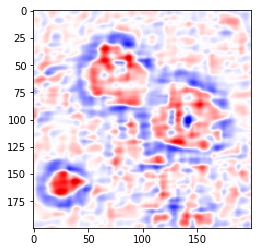

In [313]:
plt.figure()
plt.imshow(ftest,cmap='seismic',vmin=-2.e+4,vmax=2.e+4)
plt.show()

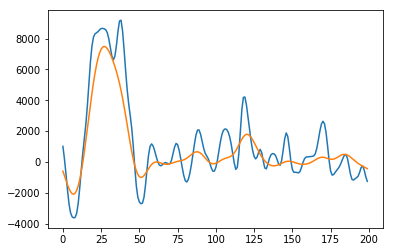

In [314]:
plt.plot(ftest[160])
plt.plot(C_blur[160])

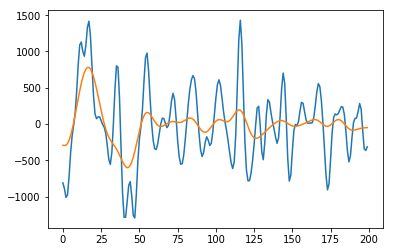

In [315]:
plt.plot(np.gradient(ftest[160]))
plt.plot(np.gradient(C_blur[160]))

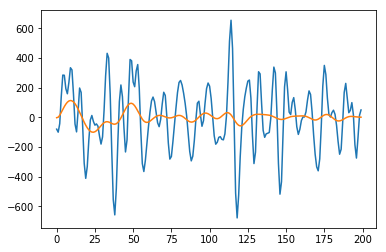

In [316]:
plt.plot(np.gradient(np.gradient(ftest[160])))
plt.plot(np.gradient(np.gradient(C_blur[160])))

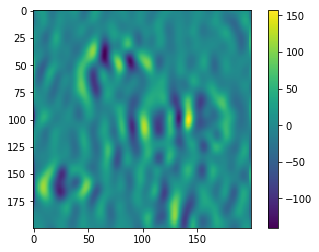

In [317]:
plt.figure()
plt.imshow(dx2)
plt.colorbar()
plt.show()

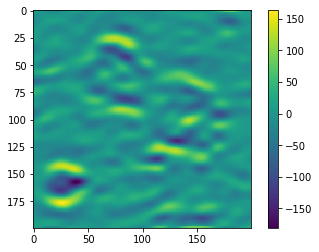

In [318]:
plt.figure()
plt.imshow(dy2)
plt.colorbar()
plt.show()

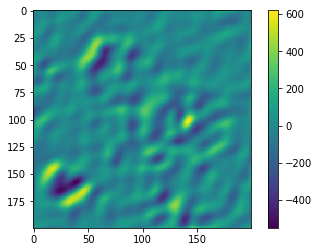

In [319]:
plt.figure()
plt.imshow(dxy2)
plt.colorbar()
plt.show()

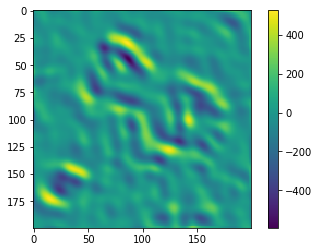

In [320]:
plt.figure()
plt.imshow(dyx2)
plt.colorbar()
plt.show()

In [329]:
conditions = np.where(dx2<0.,1,0)*np.where(dy2<0.,1,0)*np.where(dxy2<0.,1.,0)*np.where(dyx2<0.,1,0)
print conditions

[[ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  0. ...,  0.  1.  1.]
 [ 1.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


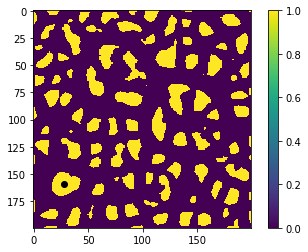

In [347]:
plt.figure()
plt.imshow(conditions)
plt.plot([10+18],[140+19],'ko')
plt.colorbar()
plt.show()

In [337]:
rows,cols = np.where(conditions[140:175,10:50]==True)

In [344]:
print np.sum(rows)/np.count_nonzero(rows)
print np.sum(cols)/np.count_nonzero(rows)

19
18
